# Great Lakes Maps
Code by Maria D Hernandez Limon - updated 6/27/22

## 1. Set-up working space:

In [1]:
#to read in a table with station info 
import pandas as pd

#for the points
import matplotlib.pyplot as plt
%matplotlib inline

#for the maps - make sure to install cartopy before running script
import cartopy
import cartopy.crs as crs
import cartopy.feature as cfeature

## 2. Load in your data:

In [93]:
#this is the specific directory where the data we want to use is stored and where you want the output
data_input = '../'
data_out='maps_out/'

In [81]:
gl_stations=pd.read_csv(data_input+'LG_station_location.csv')
gl_stations

,STATION_ID,LONGITUDE,LATITUDE,LAKE,Buoy_or_station,lake
0,ER15M,-79.893033,42.516133,Erie,45142,ER
1,ER78M,-81.250117,42.116883,Erie,45132,ER
2,ER91M,-82.916000,41.840000,Erie,45005,ER
3,HU15M,-82.349817,44.000050,Huron,45008,HU
4,HU45M,-82.984150,45.136350,Huron,45003,HU
5,HU54M,-83.416667,45.516750,Huron,SRLM4,HU
6,HUFE,-83.016350,45.249767,Huron,SRLM4,HU
7,MI18M,-86.999033,42.734267,Michigan,45007,MI
8,MI27M,-86.916000,43.600000,Michigan,SGNW43,MI
9,MI41M,-86.722000,44.737000,Michigan,45002,MI


## 3. Map with all stations - run this code if you don't have a column with lake in your table

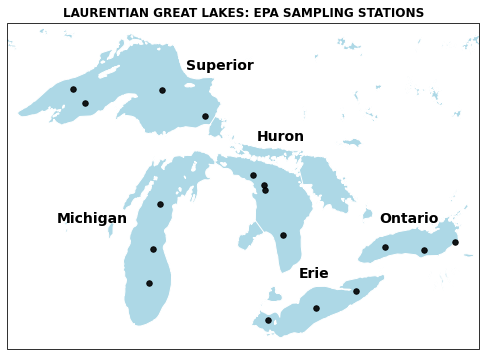

In [94]:
#__________select region from the earth map___________________
#this will select a mid point based on the info in the gl_stations table
central_lat = gl_stations['LATITUDE'].mean()
central_lon = gl_stations['LONGITUDE'].mean()

#if you want to see all the lakes even if you don't have stations in some then run these lines and comment out those above
#central_lat = 44.54999217647059
#central_lon = -83.57815488235293

#extent is the [west_point,east_point,south_point,north_point]
extent = [gl_stations['LONGITUDE'].min()-1.5, gl_stations['LONGITUDE'].max()+.5, gl_stations['LATITUDE'].min()-1, gl_stations['LATITUDE'].max()+1.5]

#__________this starts the map plot 
plt.figure(figsize=(12, 6))  #size of the plot
ax = plt.axes(projection=crs.Orthographic(central_lon, central_lat))
ax.set_extent(extent)

#this adds the actual map - you can change the line and face colors
ax.add_feature(cartopy.feature.LAKES,edgecolor='white',facecolor='lightblue',alpha=1)

##add multiple points -- to add multiple points we use scatteplot but we must pass crs.PlateCarree() in transform,
#maybe there are other ways but this is the only way it works for me
ax.scatter(x=gl_stations.LONGITUDE, y=gl_stations.LATITUDE,color="black",
            s=30,alpha=0.9,transform=crs.PlateCarree(),zorder=2)

#add labels for each of the lakes - change the font size and weight as you need
ax.text(0.45, 0.87, 'Superior', horizontalalignment='center',
     verticalalignment='center',fontsize=14,fontweight="bold", transform=ax.transAxes)

ax.text(0.18, 0.40, 'Michigan', horizontalalignment='center',
     verticalalignment='center',fontsize=14, fontweight="bold",transform=ax.transAxes)

ax.text(0.58, 0.65, 'Huron', horizontalalignment='center',
     verticalalignment='center',fontsize=14,fontweight="bold", transform=ax.transAxes)

ax.text(0.65, 0.23, 'Erie', horizontalalignment='center',
     verticalalignment='center', fontsize=14,fontweight="bold",transform=ax.transAxes)

ax.text(0.85, 0.4, 'Ontario', horizontalalignment='center',
     verticalalignment='center', fontsize=14,fontweight="bold",transform=ax.transAxes)


#set title
ax.set_title('LAURENTIAN GREAT LAKES: EPA SAMPLING STATIONS',fontweight="bold")
#save plot  - change name of your file here - can save as whatever file type you want 
plt.savefig(data_out+'gl_stations.png',dpi=600)

plt.show()

## 4. Map with each lake has stations with different colors - must have lake column in table

extent of the map [-91.6518, -75.833833, 40.84, 49.105667]


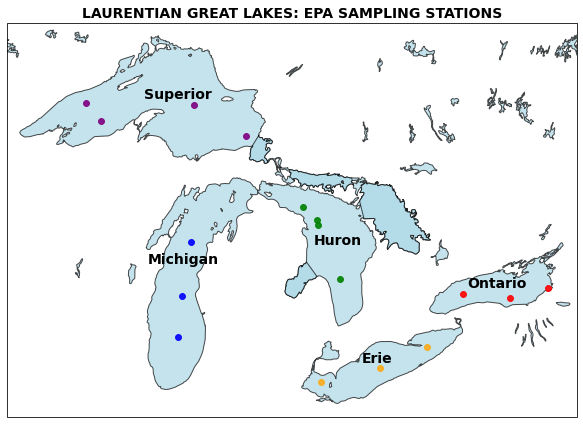

In [95]:
central_lat = gl_stations['LATITUDE'].mean()
central_lon = gl_stations['LONGITUDE'].mean()
#extent is the [west_point,east_point,south_point,north_point]
extent = [gl_stations['LONGITUDE'].min()-1.5, gl_stations['LONGITUDE'].max()+.5, gl_stations['LATITUDE'].min()-1, gl_stations['LATITUDE'].max()+1.5]
print('extent of the map',extent)

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=crs.Orthographic(central_lon, central_lat))
ax.set_extent(extent)

ax.add_feature(cartopy.feature.LAKES,edgecolor='black',facecolor='lightblue',alpha=.7)

##add points, one scatter plot per lake so each lake can have 

#this first line selects for only stations labeled as a specific lake - here Superior
SU=gl_stations.loc[gl_stations['lake']=='SU'] 
#this line plots the points 
ax.scatter(x=SU.LONGITUDE, y=SU.LATITUDE,color="purple",s=35,alpha=0.9,transform=crs.PlateCarree(),zorder=2)
#this line add the name label
ax.text(0.3, 0.82, 'Superior', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes,fontweight="bold",size=14)

MI=gl_stations.loc[gl_stations['lake']=='MI']
ax.scatter(x=MI.LONGITUDE, y=MI.LATITUDE,color="blue",s=35,alpha=0.9,transform=crs.PlateCarree(),zorder=2)
ax.text(0.31, 0.40, 'Michigan', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes,fontweight="bold",size=14)

HU=gl_stations.loc[gl_stations['lake']=='HU']
ax.scatter(x=HU.LONGITUDE, y=HU.LATITUDE,color="green",s=35,alpha=0.9,transform=crs.PlateCarree(),zorder=2)
ax.text(0.58, 0.45, 'Huron', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes,fontweight="bold",size=14)

ER=gl_stations.loc[gl_stations['lake']=='ER']
ax.scatter(x=ER.LONGITUDE, y=ER.LATITUDE,color="orange",s=35,alpha=0.8,transform=crs.PlateCarree(),zorder=2)
ax.text(0.65, 0.15, 'Erie', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes,fontweight="bold",size=14)

ON=gl_stations.loc[gl_stations['lake']=='ON']
ax.scatter(x=ON.LONGITUDE, y=ON.LATITUDE,color="red",s=35,alpha=0.9,transform=crs.PlateCarree(),zorder=2)
ax.text(0.86, 0.34, 'Ontario', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes,fontweight="bold",size=14)


#add title
ax.set_title('LAURENTIAN GREAT LAKES: EPA SAMPLING STATIONS',fontweight="bold",size=14)

#save plot
plt.tight_layout()
#change name of file here 
plt.savefig(data_out+'gl_map_color_stations.png',dpi=600)

plt.show()

## 5. Map with each lake as a different color - must have a column for lake in table

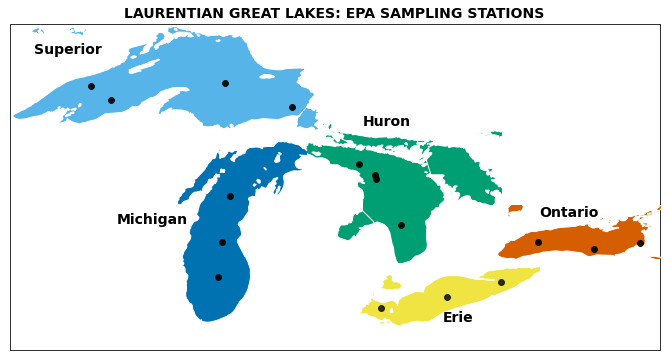

In [96]:
#colors for the lakes 
# HU, SU, MI, ER, ON
cc=["#56B4E9","#0072B2","#009E73", "#F0E442", "#D55E00"]


#start plot 
plt.figure(figsize=(12, 6))

#main plot - the map where the other maps are laid on
central_lat = gl_stations['LATITUDE'].mean()
central_lon = gl_stations['LONGITUDE'].mean()
ax = plt.axes(projection=crs.PlateCarree(), label='1')
extent=[-92.3, -75.833833, 40.84, 49.105667]
ax.set_extent(extent)
#ax.add_feature(cartopy.feature.LAKES,edgecolor='black',facecolor='black',alpha=.8)
#ax.set_frame_on(False)


###each chunck of code does the same - one for each lake 

#_____________Huron_____________
#start a lake projection
HU_ax = plt.axes(projection=crs.PlateCarree())
HU_ax.add_feature(cartopy.feature.LAKES,edgecolor='white',facecolor=cc[2],zorder=0)
HU_ax.set_axis_off()
#select only the portion of the map with the lake we want 
HU_extent=[-84.75, -79.83, 43.04, 46.60]
HU_ax.set_extent(HU_extent, crs=crs.PlateCarree())
#get the canvas part of the big plot
ax.get_figure().canvas.draw()
#draw map on the canvas part selected
HU_ax.set_position([0.4699, 0.325, 0.245, .33])

###stations and text
HU=gl_stations.loc[gl_stations['lake']=='HU']
#stations or points to plot - can change colors here 
HU_ax.scatter(x=HU.LONGITUDE, y=HU.LATITUDE,color="black",s=35,alpha=0.9,transform=crs.PlateCarree(),zorder=1)
#names of lakes - can change text here
HU_ax.text(0.58, 0.70, 'Huron', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes,fontweight="bold",size=14)


#_____________Superior_____________
SU_ax = plt.axes(projection=crs.PlateCarree())
SU_ax.add_feature(cartopy.feature.LAKES,edgecolor='white',facecolor=cc[0],zorder=0)
SU_ax.set_axis_off()
SU_extent=[-92.25, -84.5, 46.14, 49.105667]
SU_ax.set_extent(SU_extent, crs=crs.PlateCarree())

###stations and text
SU=gl_stations.loc[gl_stations['lake']=='SU']
SU_ax.scatter(x=SU.LONGITUDE, y=SU.LATITUDE,color="black",s=35,alpha=0.9,transform=crs.PlateCarree(),zorder=1)
###new color and text
ax.get_figure().canvas.draw()
SU_ax.set_position([0.1335, 0.53, 0.36, .43])
SU_ax.text(0.09, 0.92, 'Superior', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,color='black',fontweight="bold",size=14)


#_____________Michigan_____________
MI_ax = plt.axes(projection=crs.PlateCarree())
MI_ax.add_feature(cartopy.feature.LAKES,edgecolor='white',facecolor=cc[1],zorder=0)
MI_ax.set_axis_off()
MI_extent=[-88, -84.8, 41.5, 46.105667]
MI_ax.set_extent(MI_extent, crs=crs.PlateCarree())
ax.get_figure().canvas.draw()
MI_ax.set_position([0.306, 0.178, 0.2, .43])

###stations and text
MI=gl_stations.loc[gl_stations['lake']=='MI']
MI_ax.scatter(x=MI.LONGITUDE, y=MI.LATITUDE,color="black",s=35,alpha=0.9,transform=crs.PlateCarree(),zorder=1)
MI_ax.text(0.22, 0.40, 'Michigan', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontweight="bold",size=14)


#_____________Ontario_____________
ON_ax = plt.axes(projection=crs.PlateCarree())
ON_ax.add_feature(cartopy.feature.LAKES,edgecolor='white',facecolor=cc[4],zorder=0)
ON_ax.set_axis_off()
ON_extent=[-79.8, -75.833833, 43.2, 44.5]
ON_ax.set_extent(ON_extent, crs=crs.PlateCarree())
ax.get_figure().canvas.draw()
ON_ax.set_position([0.7, 0.1826, 0.19, .43])

#stations and text
ON=gl_stations.loc[gl_stations['lake']=='ON']
ON_ax.scatter(x=ON.LONGITUDE, y=ON.LATITUDE,color="black",s=35,alpha=0.9,transform=crs.PlateCarree(),zorder=1)
ON_ax.text(0.86, 0.42, 'Ontario', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes,fontweight="bold",size=14)

#_____________Erie_____________
ER_ax = plt.axes(projection=crs.PlateCarree())
ER_ax.add_feature(cartopy.feature.LAKES,edgecolor='white',facecolor=cc[3],zorder=0)
ER_ax.set_axis_off()
ER_extent=[-83.5, -78.9, 41.35, 42.9]
ER_ax.set_extent(ER_extent, crs=crs.PlateCarree())
ax.get_figure().canvas.draw()
ER_ax.set_position([0.54, 0.047, 0.21, .4])

#stations and text
ER=gl_stations.loc[gl_stations['lake']=='ER']
ER_ax.scatter(x=ER.LONGITUDE, y=ER.LATITUDE,color="BLACK",s=35,alpha=0.8,transform=crs.PlateCarree(),zorder=1)
ER_ax.text(0.69, 0.1, 'Erie', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes,fontweight="bold",size=14)


#set a title for plot 
ax.set_title('LAURENTIAN GREAT LAKES: EPA SAMPLING STATIONS',fontweight="bold",size=14)

#save plot - change the name of your file here
plt.savefig(data_out+'gl_map_color_lakes.pdf',dpi=400)

plt.show()

## 6. One plot per lake

In [89]:
def get_lake_plot(lake,color,stations):
    central_lat = 44.54999217647059
    central_lon = -83.57815488235293
    
    if lake == 'SU':
        extent= [-92.1518, -84.5, 46.14, 49.105667]
        lake_name='Superior'
    elif lake == 'HU':
        extent = [-84.75179999999999, -79.833833, 43.040000000000006, 46.605667]
        lake_name='Huron'
    elif lake == 'MI':
        extent = [-88, -84.8, 41.5, 46.105667]
        lake_name='Michigan'
    elif lake =='ON':
        extent=[-79.8, -75.833833, 43.2, 44.5]
        lake_name='Ontario'
    elif lake == 'ER':
        extent=[-83.5, -78.9, 41.35, 42.9]
        lake_name='Erie'
    else:
        print('check lake input')
        
        
    plt.figure(figsize=(12, 6))
    ax = plt.axes(projection=crs.Orthographic(central_lon, central_lat))
    ax.set_extent(extent)

    ax.add_feature(cartopy.feature.LAKES,edgecolor='black',facecolor=color)

    ##add points
    if stations==True:
        ax.scatter(x=gl_stations.LONGITUDE, y=gl_stations.LATITUDE,color="black",
                    s=40,alpha=0.8,transform=crs.PlateCarree())

    #add labels - change size and font type here
    ax.set_title(f'EPA Sampling Stations: {lake_name}',fontweight="bold",size=14)
    plt.savefig(data_out+f'{lake_name}_map.pdf')

    plt.show()


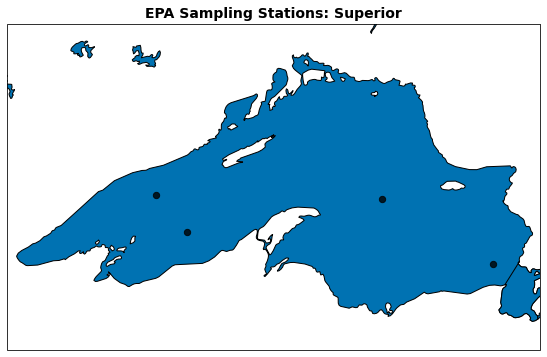

In [90]:
get_lake_plot('SU',"#0072B2",True)